In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Required for timedelta method
import datetime as dt

# Required for strptime method
from datetime import datetime as dtdt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Headers
header1 = session.query(Measurement).first()
header1.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d14dd565f8>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [11]:
# Header
header2 = session.query(Station).first()
header2.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d14dd630b8>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

# Exploratory Climate Analysis

In [12]:
# Obtain a vacation start date
start_date = input("What day is the beginning of your vacation? (yyyy-mm-dd)")
start_date

What day is the beginning of your vacation? (yyyy-mm-dd)2015-03-22


'2015-03-22'

In [13]:
# Obtain a vacation end date
end_date = input("What day is the end of your vacation? (yyyy-mm-dd)")
end_date

What day is the end of your vacation? (yyyy-mm-dd)2015-12-31


'2015-12-31'

In [14]:
# Perform a query to retrieve the data and precipitation scores
session = Session(engine)
precip_l12 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
precip_l12

[('2015-03-22', 0.0),
 ('2015-03-23', 0.0),
 ('2015-03-24', 0.0),
 ('2015-03-25', 0.0),
 ('2015-03-26', 0.26),
 ('2015-03-27', 0.0),
 ('2015-03-28', 0.0),
 ('2015-03-29', 0.41),
 ('2015-03-30', 0.04),
 ('2015-03-31', 0.0),
 ('2015-04-01', 0.0),
 ('2015-04-02', 0.0),
 ('2015-04-03', 0.0),
 ('2015-04-04', 0.0),
 ('2015-04-05', 0.0),
 ('2015-04-06', 0.0),
 ('2015-04-07', 0.0),
 ('2015-04-08', 0.01),
 ('2015-04-09', 0.0),
 ('2015-04-10', 0.0),
 ('2015-04-11', 0.0),
 ('2015-04-12', 0.0),
 ('2015-04-13', 0.0),
 ('2015-04-14', 0.03),
 ('2015-04-15', 0.01),
 ('2015-04-16', 0.0),
 ('2015-04-17', 0.06),
 ('2015-04-18', 0.0),
 ('2015-04-19', 0.0),
 ('2015-04-20', 0.0),
 ('2015-04-21', 0.0),
 ('2015-04-22', 0.03),
 ('2015-04-23', 0.0),
 ('2015-04-24', 0.07),
 ('2015-04-25', 0.0),
 ('2015-04-26', 0.01),
 ('2015-04-27', 0.06),
 ('2015-04-28', 0.04),
 ('2015-04-29', 0.02),
 ('2015-04-30', 0.0),
 ('2015-05-01', 0.06),
 ('2015-05-02', 0.0),
 ('2015-05-03', 0.0),
 ('2015-05-04', 0.0),
 ('2015-05-05', 0.

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
precip_df = pd.DataFrame(precip_l12).set_index('date').sort_values('date', ascending=True)
precip_df.head()

,prcp
date,
2015-03-22,0.00
2015-03-22,NaN
2015-03-22,0.10
2015-03-22,0.08
2015-03-22,NaN


Text(0.5,1,'Precipitation over time')

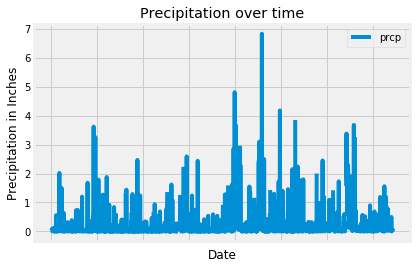

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
# Images/precipitation.png

### TO DO: VERTICAL LINES AT MONTHS OR SERIES BY STATION

precip_df.plot()
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
plt.title("Precipitation over time")

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# Images/describe.png
precip_df.describe()

,prcp
count,1665.000000
mean,0.236414
std,0.533269
min,0.000000
25%,0.000000
50%,0.040000
75%,0.210000
max,6.830000


In [18]:
# Design a query to show how many stations are available in this dataset?
session = Session(engine)
session.query(Station.station).distinct().count()

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session = Session(engine)
station_activity = session.query(Measurement.station,func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session = Session(engine)
top_station = station_activity[0][0]
top_station

'USC00519281'

In [21]:
top_station_temps = session.query(Measurement.tobs).filter(Measurement.station == top_station)
top_station_temps

In [22]:
low_temp = min(top_station_temps)
low_temp

(54.0)

In [23]:
high_temp = max(top_station_temps)
high_temp

(85.0)

In [24]:
# testing if func.max gives same result as max of initial query TRUE
high_temp2 = session.query(func.max(Measurement.tobs)).filter(Measurement.station == top_station).all()
high_temp2

[(85.0)]

In [25]:
### # Average can be obtained with func only. Produces number as a tuple within a list rather than just a string or integer.
session = Session(engine)
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == top_station).all()
avg_temp

[(71.66378066378067)]

In [27]:
# Choose the station with the highest number of temperature observations.
# Query for the dates of your vacation
session = Session(engine)
top_stn_query = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == top_station).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
temps_df = pd.DataFrame(top_stn_query).sort_values('date',ascending=True).set_index('date')
temps_df.head()

,tobs
date,
2015-03-22,73.0
2015-03-23,68.0
2015-03-24,62.0
2015-03-25,63.0
2015-03-26,70.0


Text(0.5,1,'Temperature Frequency \n of Most Active Station')

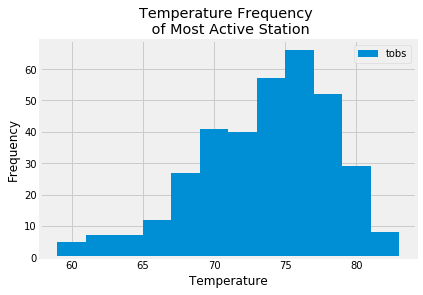

In [82]:
# Images/station-histogram.png
temps_df.plot(kind='hist',bins=12)
plt.xlabel("Temperature")
plt.title("Temperature Frequency \n of Most Active Station")

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# Convert datetime object to string to be passed to method
calc_temp2 = calc_temps(start_date, end_date)
calc_temp2

[(62.0, 75.51802044109736, 86.0)]

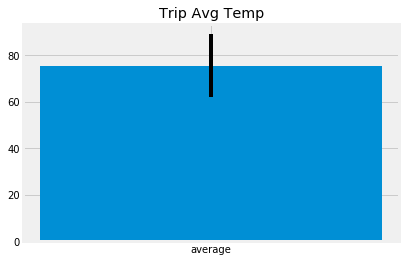

In [45]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

err = [(calc_temp2[0][1]-calc_temp2[0][0],calc_temp2[0][2]-calc_temp2[0][1])]
plt.bar("average",calc_temp2[0][1],yerr= err)
plt.title("Trip Avg Temp")
plt.show()

In [52]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# Merge tables to access all fields
### TO DO:: Filter dates which are strings

total_rain_query = engine.execute('SELECT date,station, sum(prcp), station.name, station.latitude, station.longitude, station.elevation \
                            FROM measurement JOIN station USING (station) \
                             GROUP BY station ORDER BY sum(prcp) desc').fetchall()
total_rain_query

[('2017-08-23', 'USC00516128', 1068.0899999999956, 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 ('2017-08-18', 'USC00519281', 588.6399999999976, 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('2017-07-31', 'USC00513117', 382.61999999999847, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('2017-08-23', 'USC00519523', 295.67999999999944, 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 ('2017-08-23', 'USC00514830', 234.49000000000026, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 ('2017-08-23', 'USC00519397', 131.62000000000063, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('2015-10-30', 'USC00511918', 92.68000000000006, 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('2015-11-20', 'USC00518838', 70.87000000000005, 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('2017-07-31', 'USC00517948', 43.44000000000002, 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]

In [102]:
# Alternative 
# Verify sums while I figure out how to filter by date which is a string

session = Session(engine)
total_rain_query = session.query(Measurement.station, func.sum(Measurement.prcp)).filter(Measurement.date >= year_date).\
    group_by(Measurement.station).order_by(func.sum(Measurement.prcp)).all()
total_rain_query2

[('USC00517948', 4.59),
 ('USC00519397', 16.089999999999986),
 ('USC00514830', 33.19),
 ('USC00519523', 37.99),
 ('USC00513117', 48.36000000000003),
 ('USC00519281', 68.24000000000002),
 ('USC00516128', 147.11000000000004)]

## Optional Challenge Assignment

In [145]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [148]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start = "03-22"
end = "04-05"

# Use the start and end date to create a range of dates
date_range = 

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
